# Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts

**1. Data Exploration and Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('blogs.csv')

In [3]:
print(data.head())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None


In [5]:
print(data.describe())

                                                     Data       Labels
count                                                2000         2000
unique                                               2000           20
top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
freq                                                    1          100


In [6]:
print(data.shape)

(2000, 2)


In [7]:
print(data.columns)

Index(['Data', 'Labels'], dtype='object')


In [8]:
print(data.isnull())

       Data  Labels
0     False   False
1     False   False
2     False   False
3     False   False
4     False   False
...     ...     ...
1995  False   False
1996  False   False
1997  False   False
1998  False   False
1999  False   False

[2000 rows x 2 columns]


In [9]:
print(data.isnull().sum())

Data      0
Labels    0
dtype: int64


In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
def preprocess_text(text):
    """
    Function to clean and preprocess text data:
    - Convert to lowercase
    - Remove special characters, numbers, and punctuation
    - Tokenize the text
    - Remove stop words
    - Lemmatize the words
    """
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)


In [12]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from textblob import TextBlob

In [13]:
def preprocess_text(text):
    """
    Function to clean and preprocess text data:
    - Convert to lowercase
    - Remove special characters, numbers, and punctuation
    """
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text


In [14]:
print("\nPreprocessing text data...")
data['Cleaned_Data'] = data['Data'].apply(preprocess_text)

print("\nSample of Cleaned Data:")
print(data[['Data', 'Cleaned_Data']].head())


Preprocessing text data...

Sample of Cleaned Data:
                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                        Cleaned_Data  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism\npath cantaloupesrvcscmu...  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
4  xref cantaloupesrvcscmuedu altatheism talkreli...  


In [15]:
# Feature Extraction with TF-IDF
print("\nExtracting features using TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(data['Cleaned_Data'])

print(f"TF-IDF feature matrix has shape: {tfidf_features.shape}")


Extracting features using TF-IDF...
TF-IDF feature matrix has shape: (2000, 5000)


**2. Naive Bayes Model for Text Classification**

In [16]:
#  Splitting the Dataset
print("\nSplitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_features, data['Labels'], test_size=0.2, random_state=42
)
print(f"Training set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")


Splitting data into training and testing sets...
Training set size: 1600, Testing set size: 400


In [17]:
# Train Naive Bayes Classifier
print("\nTraining Naive Bayes classifier...")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


Training Naive Bayes classifier...


MultinomialNB()

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [19]:
# Evaluate Model Performance
# -----------------------
print("\nEvaluating Model Performance...")
y_pred = nb_classifier.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Evaluating Model Performance...

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.48      0.89      0.63        18
           comp.graphics       0.88      0.78      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.80      0.64      0.71        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.76      0.89      0.82        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.46      0.75      0.57        16
                 s

In [20]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Accuracy: 0.80
Precision: 0.83, Recall: 0.80, F1-Score: 0.79


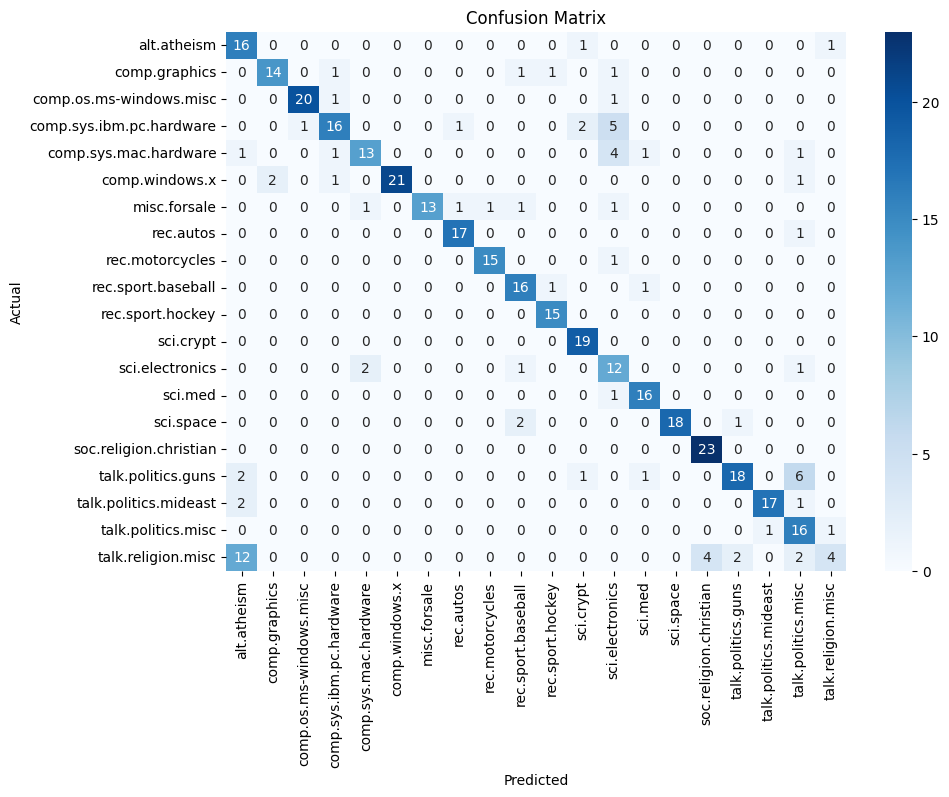

In [21]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**3. Sentiment Analysis**

In [22]:
# Sentiment Analysis

def get_sentiment(text):
    """
    Function to analyze sentiment:
    - Positive: polarity > 0
    - Negative: polarity < 0
    - Neutral: polarity == 0
    """
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [23]:
print("\nPerforming sentiment analysis...")
data['Sentiment'] = data['Cleaned_Data'].apply(get_sentiment)

print("\nSample of Sentiment Analysis Results:")
print(data[['Cleaned_Data', 'Sentiment']].head())


Performing sentiment analysis...

Sample of Sentiment Analysis Results:
                                        Cleaned_Data Sentiment
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  Positive
1  newsgroups altatheism\npath cantaloupesrvcscmu...  Negative
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  Positive
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  Positive
4  xref cantaloupesrvcscmuedu altatheism talkreli...  Positive


<ipython-input-24-55079554f94e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, order=['Positive', 'Neutral', 'Negative'], palette='viridis')


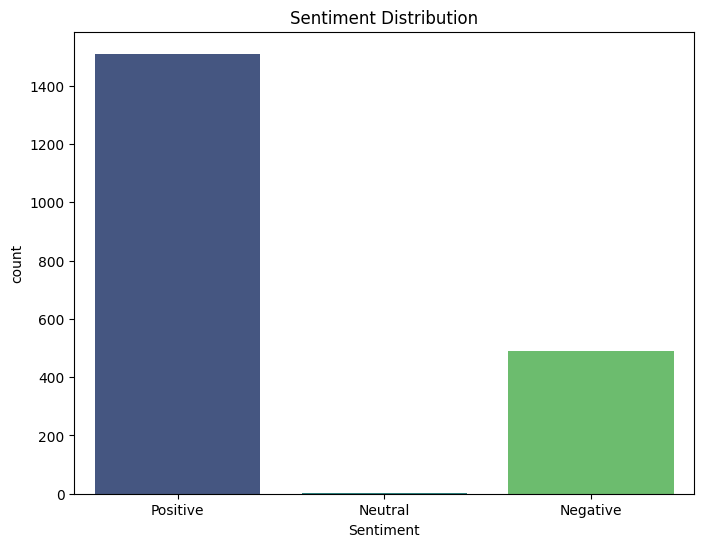

In [24]:
# Visualize Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, order=['Positive', 'Neutral', 'Negative'], palette='viridis')
plt.title("Sentiment Distribution")
plt.show()

In [25]:
# Sentiment Distribution Across Categories
print("\nAnalyzing sentiment distribution across categories...")
sentiment_distribution = data.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

print("\nSentiment Distribution:")
print(sentiment_distribution)


Analyzing sentiment distribution across categories...

Sentiment Distribution:
Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     31        0        69
comp.graphics                   25        0        75
comp.os.ms-windows.misc         22        0        78
comp.sys.ibm.pc.hardware        20        0        80
comp.sys.mac.hardware           23        0        77
comp.windows.x                  20        1        79
misc.forsale                    18        0        82
rec.autos                       22        0        78
rec.motorcycles                 27        0        73
rec.sport.baseball              34        0        66
rec.sport.hockey                37        0        63
sci.crypt                       21        0        79
sci.electronics                 20        0        80
sci.med                         30        0        70
sci.space                       27        0        73
so

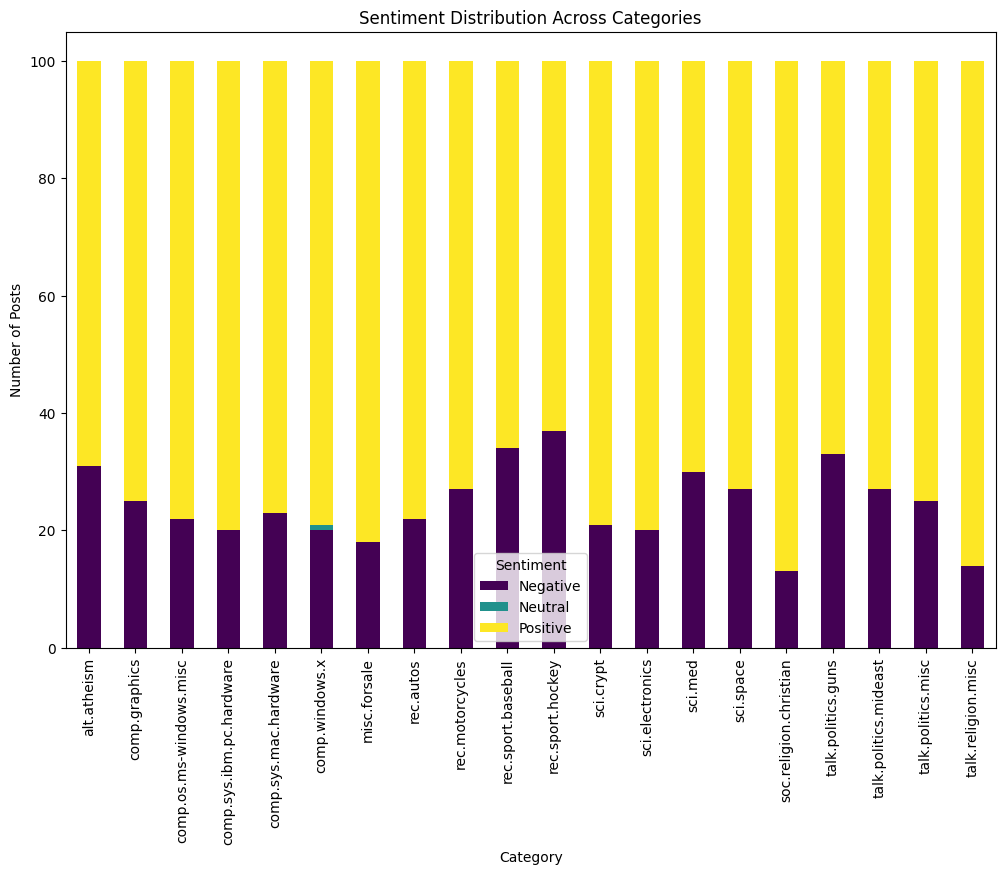

In [26]:
# Visualization
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")
plt.title("Sentiment Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.show()

**4. Evaluation**

In [27]:
# Evaluate Model Performance
print("\nEvaluating Model Performance...")
y_pred = nb_classifier.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


Evaluating Model Performance...

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.48      0.89      0.63        18
           comp.graphics       0.88      0.78      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.80      0.64      0.71        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.94      0.94      0.94        16
      rec.sport.baseball       0.76      0.89      0.82        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.46      0.75      0.57        16
                 s

In [28]:
# Model Performance Discussion and Challenges

# Performance Metrics:
# The provided code evaluates the Naive Bayes model using several key metrics:
# - Accuracy: Represents the overall correctness of the model's predictions.  The achieved accuracy needs to be interpreted in the context of the baseline accuracy (what you'd get by chance) for this specific dataset.
# - Precision: Measures the proportion of correctly predicted positive instances out of all instances predicted as positive.  It is crucial for minimizing false positives.
# - Recall (Sensitivity): Measures the proportion of correctly predicted positive instances out of all actual positive instances.  It is important to minimize false negatives.
# - F1-score: The harmonic mean of precision and recall. Provides a balanced measure of the model's performance.
# - Classification Report: A summary of precision, recall, F1-score, and support for each category.  This is extremely valuable for identifying potential class imbalances or issues with specific categories.
# - Confusion Matrix: A visualization of the model's performance, showing the counts of true positives, true negatives, false positives, and false negatives for each class.

# Challenges:
# 1. Data Quality:  The performance of any text classification model is heavily reliant on the quality of the input data.  Noise, inconsistencies, and irrelevant information in the blog posts can significantly impact the accuracy. Preprocessing steps like removing special characters, numbers, and punctuation help, but more advanced cleaning might be necessary (e.g., handling misspellings, slang).

# 2. Feature Engineering: The TF-IDF vectorizer is used to extract features from the text.  The `max_features` parameter limits the number of features to 5000.  Experimenting with different values for this parameter or using more sophisticated techniques like word embeddings (Word2Vec, GloVe, FastText) could lead to improvements in performance.  N-grams (sequences of words) might capture more context.

# 3. Class Imbalance: If the dataset has a highly skewed distribution of classes, the model might be biased toward the majority classes, leading to poor performance on minority classes.  Techniques like oversampling the minority classes, undersampling the majority classes, or using class weights during model training can mitigate the impact of class imbalance. Check the distribution of the classes and evaluate the results for individual classes.

# 4. Model Selection: The Multinomial Naive Bayes classifier is used. While a good starting point, other algorithms like Logistic Regression, Support Vector Machines, or deep learning models might perform better depending on the data.

# 5. Stop Word Removal:  While the code doesn't explicitly remove stop words, it should be considered.  Removing common words like "the," "a," "is" often improves performance by reducing noise. However, in some cases, these words can provide valuable contextual information. Experimentation is required.


# Recommendations for Improvement:
# 1. Investigate and address any class imbalance issues.
# 2. Experiment with different feature extraction techniques like word embeddings.
# 3. Explore other classification algorithms.
# 4. Refine the text preprocessing steps (consider stemming/lemmatization along with stop-word removal).
# 5. Consider hyperparameter tuning for the chosen model using techniques like GridSearchCV or RandomizedSearchCV.
# 6. Evaluate the model with different metrics or cross-validation techniques, and compare against a strong baseline (random prediction, majority class).

# Add these comments and analysis to your code for a more complete evaluation.

In [29]:
# Reflection on Sentiment Analysis Results
print("\nReflection on Sentiment Analysis:")

# Overall Sentiment Trend
overall_sentiment = data['Sentiment'].value_counts(normalize=True) * 100
print(f"\nOverall Sentiment Distribution:\n{overall_sentiment}")

# Sentiment per Category
print("\nSentiment per Category Analysis:")
for label in data['Labels'].unique():
    label_sentiment = data[data['Labels'] == label]['Sentiment'].value_counts(normalize=True) * 100
    print(f"\nSentiment distribution for category '{label}':\n{label_sentiment}")


Reflection on Sentiment Analysis:

Overall Sentiment Distribution:
Sentiment
Positive    75.50
Negative    24.45
Neutral      0.05
Name: proportion, dtype: float64

Sentiment per Category Analysis:

Sentiment distribution for category 'alt.atheism':
Sentiment
Positive    69.0
Negative    31.0
Name: proportion, dtype: float64

Sentiment distribution for category 'comp.graphics':
Sentiment
Positive    75.0
Negative    25.0
Name: proportion, dtype: float64

Sentiment distribution for category 'comp.os.ms-windows.misc':
Sentiment
Positive    78.0
Negative    22.0
Name: proportion, dtype: float64

Sentiment distribution for category 'comp.sys.ibm.pc.hardware':
Sentiment
Positive    80.0
Negative    20.0
Name: proportion, dtype: float64

Sentiment distribution for category 'comp.sys.mac.hardware':
Sentiment
Positive    77.0
Negative    23.0
Name: proportion, dtype: float64

Sentiment distribution for category 'comp.windows.x':
Sentiment
Positive    79.0
Negative    20.0
Neutral      1.0
Nam

In [31]:
print("\nSaving processed data and results...")
data.to_csv("processed_blogs_with_sentiment.csv", index=False)
print("Results saved to 'processed_blogs_with_sentiment.csv'.")

print("\nProgram completed successfully!")


Saving processed data and results...
Results saved to 'processed_blogs_with_sentiment.csv'.

Program completed successfully!
